<a href="https://colab.research.google.com/github/satyaabdul/Clustering-Analysis-of-Healthcare-Facilities/blob/main/Clustering_Analysis_of_Healthcare_Facilities.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Clustering Analysis of Healthcare Facilities in the Special Region of Yogyakarta Using KMeans and OSMnx**

**Table of Contents**

>>>[Introduction](#scrollTo=wGQ4gHMIZDiq)

>>>[Preparation](#scrollTo=ipxChrqHa3Yz)

>>>[Data Collection](#scrollTo=cZK3Cydwb9g4)

>>>[Clustering of Healthcare Facilities Using KMeans](#scrollTo=5Aj9mKvLfZ_G)

>>>[Area Coverage Analysis](#scrollTo=E1c5y1wJkJRT)


## **Introduction**

This project aims to analyze the distribution of healthcare facilities in the Special Region of Yogyakarta (DIY) and evaluate the areas accessible to these facilities based on spatial locations. By applying clustering to healthcare facility data using the KMeans algorithm, this project provides insights into the spatial distribution of healthcare services and compares them with the administrative boundaries of cities and regencies to assess service coverage.

**Project Objectives**

- Identify clusters of healthcare facility distribution in the DIY region.

- Compare the resulting clusters with the administrative data of cities and regencies in DIY.

- Evaluate the service coverage of healthcare facilities within each city/regency.


**Methodology**



1.   **Data Collection**

  *   **Healthcare facility data** was obtained from OpenStreetMap using the OSMnx library with the following tags: `amenity=clinic`, `amenity=doctors`, and `amenity=hospital`.
  *   **Administrative boundary data** of cities/regencies in DIY was downloaded using OSMnx with the parameter `admin_level=6` (city/regency level).


2.   **Clustering with KMeans**

  *   Coordinates (latitude and longitude) of healthcare facilities were used as input for clustering using the KMeans algorithm.

  *   The optimal number of clusters was determined using the Elbow Method and Silhouette Score.

3.  **Visualization**

  * The spatial distribution and clustering of healthcare facilities were visualized using Matplotlib and GeoPandas.

  * An overlay map was created to compare clustering results with administrative boundaries.

4.   **Area Coverage Analysis**

  *    The clustering results were compared with administrative boundary data to evaluate the number of healthcare facilities in each city/regency.

  *   An analysis was conducted on the number of facilities per region and the distribution of clusters to assess accessibility.


## **Preparation**

In [1]:
# Install libraries for spatial indexing and data access
!apt install libspatialindex-dev
!pip install osmnx

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libspatialindex-c6 libspatialindex6
The following NEW packages will be installed:
  libspatialindex-c6 libspatialindex-dev libspatialindex6
0 upgraded, 3 newly installed, 0 to remove and 35 not upgraded.
Need to get 319 kB of archives.
After this operation, 1,416 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libspatialindex6 amd64 1.9.3-2 [247 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libspatialindex-c6 amd64 1.9.3-2 [55.8 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libspatialindex-dev amd64 1.9.3-2 [16.0 kB]
Fetched 319 kB in 2s (177 kB/s)
Selecting previously unselected package libspatialindex6:amd64.
(Reading database ... 126284 files and directories currently installed.)
Preparing to unpack .../libspatialindex6_1.9.3-2_amd64.deb ...
Unp

In [2]:
# Import the required libraries
import osmnx as ox
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

## **Data Collection**

In [3]:
# Define the region to be analyzed
place_name = "Special Region of Yogyakarta, Java, Indonesia"

In [4]:
# Define the healthcare facility types to be analyzed
tags = {"amenity": ["clinic", "doctors", "hospital"]}

# Retrieve healthcare facility data from OpenStreetMap using OSMnx
healthcare_DIY = ox.features_from_place(place_name, tags)

# Display the first few rows of the healthcare facility dataset
healthcare_DIY.head()


geometry   amenity healthcare  \
element id                                                            
node    1836618291  POINT (110.44871 -7.82854)  hospital        NaN   
        1938492750  POINT (110.36229 -7.81856)   doctors     doctor   
        2564059694  POINT (110.35259 -7.81751)    clinic        NaN   
        2631261031  POINT (110.35707 -7.78514)  hospital   hospital   
        2651041094    POINT (110.34915 -7.928)    clinic     clinic   

                   healthcare:speciality                             name  \
element id                                                                  
node    1836618291                   NaN               Puskesmas Piyungan   
        1938492750                   NaN                       BP4 (Paru)   
        2564059694                   NaN  Klinik Bersalin dan Bidan Pipin   
        2631261031                   NaN        Klinik Adhiwarga PKBI DIY   
        2651041094                   NaN                  Puskesmas Jetis   

                   emergency   addr:city addr:housename addr:housenumber  \
element id                                                                 
node    1836618291       yes         NaN            NaN              NaN   
        1938492750       NaN         NaN            NaN              NaN   
        2564059694        no  Yogyakarta     Gedongkiwo              NaN   
        2631261031        no  Yogyakarta            NaN              705   
        2651041094       NaN         NaN            NaN              NaN   

                                     addr:street  ... contact:whatsapp  \
element id                                        ...                    
node    1836618291                           NaN  ...              NaN   
        1938492750                           NaN  ...              NaN   
        2564059694                Jalan Prapanca  ...              NaN   
        2631261031  Jalan Tentara Rakyat Mataram  ...              NaN   
        2651041094                           NaN  ...              NaN   

                   toilets:wheelchair toilets image not:name payment:cash  \
element id                                                                  
node    1836618291                NaN     NaN   NaN      NaN          NaN   
        1938492750                NaN     NaN   NaN      NaN          NaN   
        2564059694                NaN     NaN   NaN      NaN          NaN   
        2631261031                NaN     NaN   NaN      NaN          NaN   
        2651041094                NaN     NaN   NaN      NaN          NaN   

                   payment:credit_cards payment:debit_cards addr:country type  
element id                                                                     
node    1836618291                  NaN                 NaN          NaN  NaN  
        1938492750                  NaN                 NaN          NaN  NaN  
        2564059694                  NaN                 NaN          NaN  NaN  
        2631261031                  NaN                 NaN          NaN  NaN  
        2651041094                  NaN                 NaN          NaN  NaN  

[5 rows x 87 columns]

<Axes: >

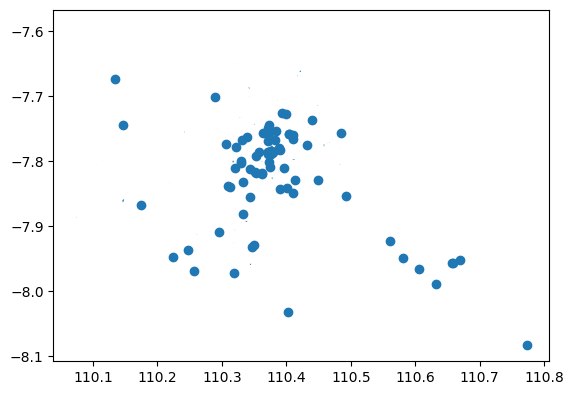

In [5]:
# Plot the locations of healthcare facilities
healthcare_DIY.plot()

**`healthcare_DIY`** : contains data on healthcare facilities, including hospitals, clinics, and medical practitioner services located within the Special Region of Yogyakarta (DIY).


In [6]:
# Retrieve the administrative boundaries of cities and regencies within the Special Region of Yogyakarta
sleman = ox.geocode_to_gdf("Sleman Regency, Special Region of Yogyakarta, Indonesia")
bantul = ox.geocode_to_gdf("Bantul Regency, Special Region of Yogyakarta, Indonesia")
kulon_progo = ox.geocode_to_gdf("Kulon Progo, Special Region of Yogyakarta, Indonesia")
gunung_kidul = ox.geocode_to_gdf("Gunung Kidul Regency, Special Region of Yogyakarta, Indonesia")
yogyakarta = ox.geocode_to_gdf("Yogyakarta, Special Region of Yogyakarta, Indonesia")

# Merge all administrative boundaries into a single GeoDataFrame called 'adm_DIY'
adm_DIY = gpd.GeoDataFrame(pd.concat([sleman, bantul, kulon_progo, gunung_kidul, yogyakarta]))

# Display the merged GeoDataFrame 'adm_DIY'
adm_DIY.head()


,geometry,bbox_west,bbox_south,bbox_east,bbox_north,place_id,osm_type,osm_id,lat,lon,class,type,place_rank,importance,addresstype,name,display_name
0,"POLYGON ((110.21591 -7.74175, 110.21617 -7.742...",110.215913,-7.837578,110.549861,-7.541289,27445797,relation,5615254,-7.689418,110.381290,boundary,administrative,12,0.469056,county,Sleman Regency,"Sleman Regency, Special Region of Yogyakarta, ..."
0,"POLYGON ((110.20385 -7.98321, 110.20413 -7.983...",110.203855,-8.028153,110.521311,-7.768021,27425501,relation,5615253,-7.898254,110.385553,boundary,administrative,12,0.449738,county,Bantul Regency,"Bantul Regency, Special Region of Yogyakarta, ..."
0,"POLYGON ((110.00353 -7.88832, 110.00421 -7.888...",110.003526,-7.983211,110.274123,-7.641639,27534327,relation,5615252,-7.812308,110.147983,boundary,administrative,12,0.424933,county,Kulonprogo,"Kulonprogo, Special Region of Yogyakarta, Java..."
0,"POLYGON ((110.33057 -8.00575, 110.33062 -8.006...",110.330575,-8.204315,110.838690,-7.781960,27530973,relation,5615251,-7.993038,110.557931,boundary,administrative,12,0.434557,county,Gunung Kidul Regency,"Gunung Kidul Regency, Special Region of Yogyak..."
0,"POLYGON ((110.34426 -7.80735, 110.34434 -7.807...",110.344261,-7.840177,110.406793,-7.766491,27438218,relation,5615250,-7.801265,110.364686,boundary,administrative,12,0.577787,city,Yogyakarta,"Yogyakarta, Special Region of Yogyakarta, Java..."


<Axes: >

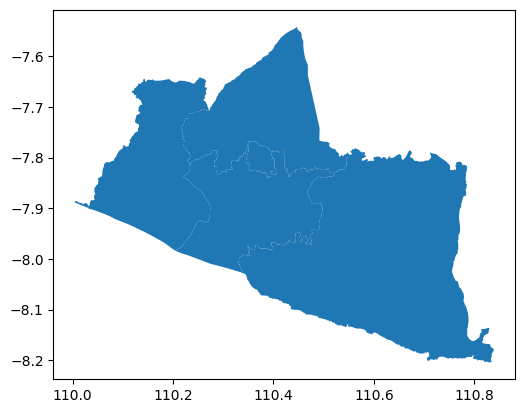

In [7]:
# Visualize the administrative boundaries of the Special Region of Yogyakarta
adm_DIY.plot()


**`adm_DIY`**: Contains the administrative boundaries within the Special Region of Yogyakarta (DIY), separated by each city/regency

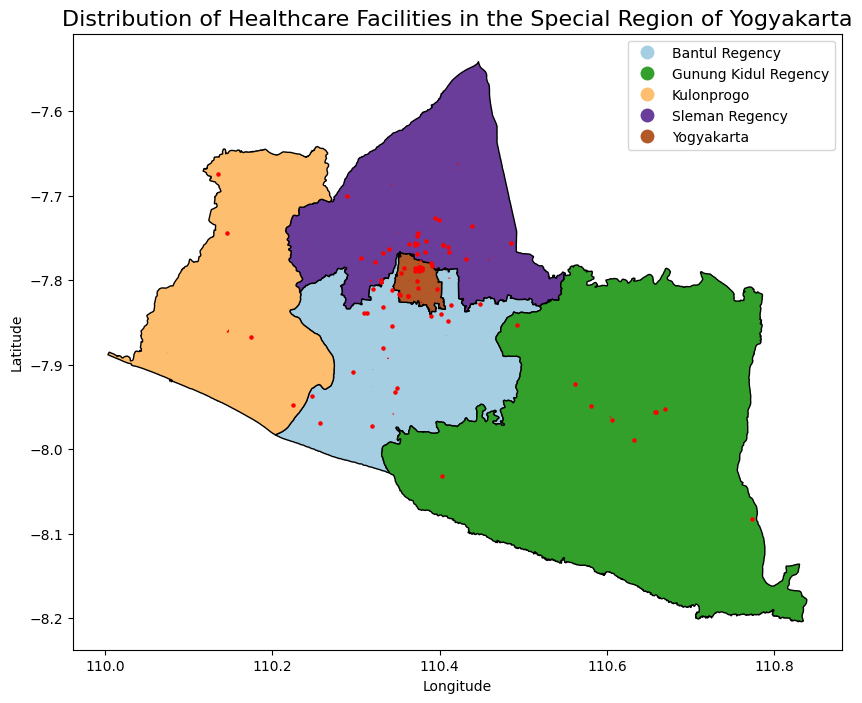

In [8]:
# Display the spatial distribution of healthcare facilities over the administrative regions of DIY
fig, ax = plt.subplots(figsize=(12, 8))

# Plot administrative boundaries
adm_DIY.plot(ax=ax, edgecolor='black', cmap='Paired', legend=True, column='name')

# Plot healthcare facility locations
healthcare_DIY.plot(ax=ax, marker='o', color='red', markersize=5)

# Add title and axis labels
ax.set_title("Distribution of Healthcare Facilities in the Special Region of Yogyakarta", fontsize=16)
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")

# Show the final map
plt.show()


## **Clustering of Healthcare Facilities Using KMeans**

**KMeans** is an algorithm commonly used to group data into a predefined number of clusters based on feature similarity.

This algorithm works by minimizing intra-cluster variation (i.e., the distance between points within a cluster) and maximizing inter-cluster variation (i.e., the distance between cluster centroids).

To apply KMeans, it is necessary to initialize the number of clusters (K). Determining the optimal value of K can be achieved using methods such as the **Elbow Method** and the **Silhouette Score**.

In [11]:
# Extract longitude and latitude from healthcare facility geometries and store them in variables 'lon' and 'lat'
healthcare_DIY["lon"] = healthcare_DIY.geometry.centroid.x
healthcare_DIY["lat"] = healthcare_DIY.geometry.centroid.y

# Create a NumPy array of coordinates to be used for clustering
coordinates = healthcare_DIY[["lon", "lat"]].to_numpy()


/tmp/ipython-input-11-1357808801.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  healthcare_DIY["lon"] = healthcare_DIY.geometry.centroid.x
/tmp/ipython-input-11-1357808801.py:3: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  healthcare_DIY["lat"] = healthcare_DIY.geometry.centroid.y


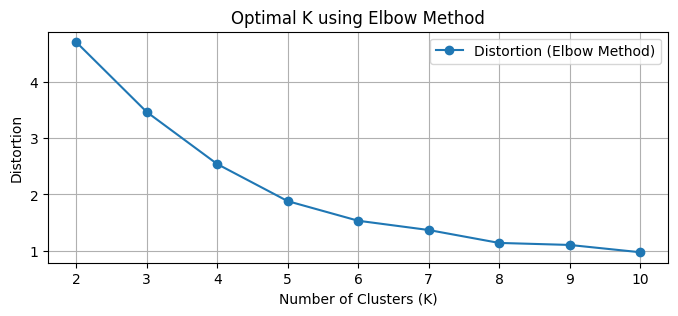

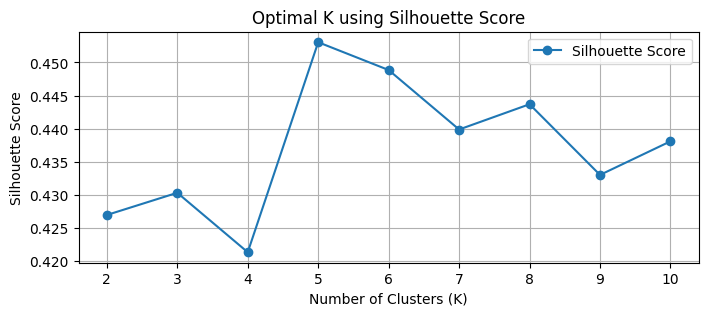

In [12]:
# Calculate Elbow and Silhouette Scores
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

distortions = []
silhouette_scores = []
K = range(2, 11)  # Evaluate cluster sizes from 2 to 10

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(coordinates)
    distortions.append(kmeans.inertia_)  # Sum of squared distances to closest cluster center
    silhouette_scores.append(silhouette_score(coordinates, kmeans.labels_))

# Plot Elbow Method results
plt.figure(figsize=(8, 3))
plt.plot(K, distortions, marker="o", label="Distortion (Elbow Method)")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Distortion")
plt.title("Optimal K using Elbow Method")
plt.legend()
plt.grid()
plt.show()

# Plot Silhouette Score results
plt.figure(figsize=(8, 3))
plt.plot(K, silhouette_scores, marker="o", label="Silhouette Score")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Silhouette Score")
plt.title("Optimal K using Silhouette Score")
plt.legend()
plt.grid()
plt.show()


Based on the results of the Elbow Method and Silhouette Score analysis, the optimal value of K is determined to be 5


In [13]:
# Set the number of clusters (K) based on the evaluation
optimal_k = 5

# Apply KMeans clustering
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
healthcare_DIY["cluster"] = kmeans.fit_predict(coordinates)


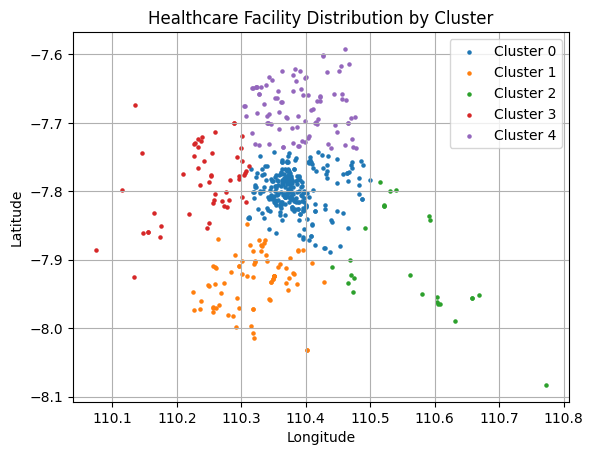

In [16]:
# Visualize the spatial distribution of healthcare facilities grouped by cluster

for cluster in range(optimal_k):
    cluster_data = healthcare_DIY[healthcare_DIY["cluster"] == cluster]
    plt.scatter(
        cluster_data["lon"], cluster_data["lat"], label=f"Cluster {cluster}", s=5
    )

plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Healthcare Facility Distribution by Cluster")
plt.legend()
plt.grid()
plt.show()


**Interpretation**  Based on the spatial results:
- Cluster 0: corresponds to **Sleman**
- Cluster 1: corresponds to **Yogyakarta City**
- Cluster 2: corresponds to **Bantul**
- Cluster 3: corresponds to **Gunung Kidul**
- Cluster 4: corresponds to **Kulon Progo**

## **Area Coverage Analysis**

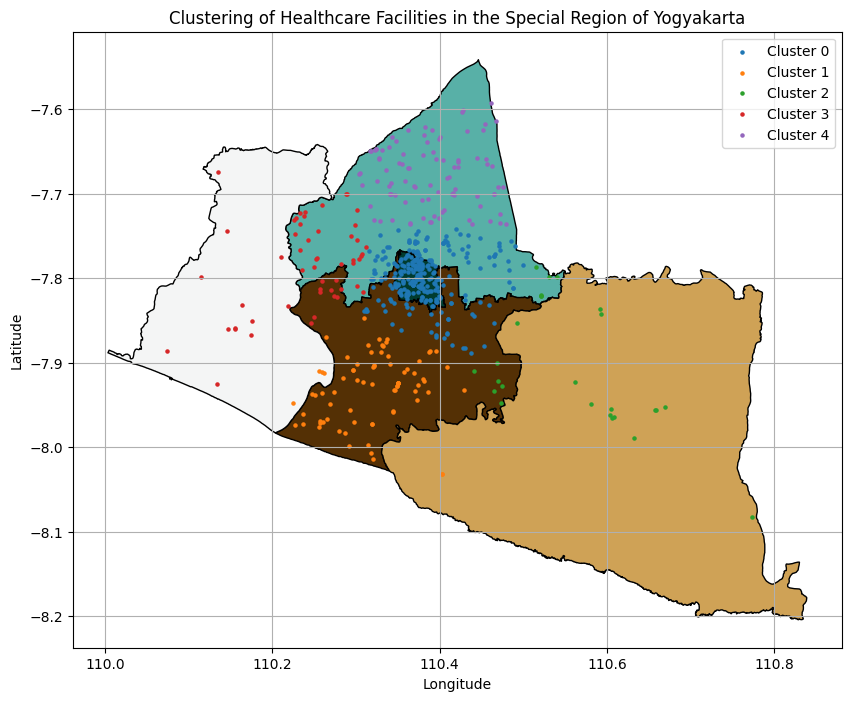

In [17]:
# Plot clustering results overlaid on administrative boundaries
fig, ax = plt.subplots(figsize=(12, 8))

# Plot administrative regions with labeled boundaries
adm_DIY.plot(ax=ax, edgecolor='black', cmap='BrBG', legend=True, column='name')

# Overlay healthcare facility clusters
for cluster in range(optimal_k):
    cluster_data = healthcare_DIY[healthcare_DIY["cluster"] == cluster]
    plt.scatter(
        cluster_data["lon"], cluster_data["lat"], label=f"Cluster {cluster}", s=5
    )

# Customize plot
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Clustering of Healthcare Facilities in the Special Region of Yogyakarta")
plt.legend()
plt.grid()
plt.show()


In [18]:
# Calculate the number of healthcare facilities in each cluster
healthcare_counts = healthcare_DIY.groupby(['cluster', 'amenity']).size().reset_index(name='count')

# Display the result
print(healthcare_counts)

    cluster   amenity  count
0         0    clinic    175
1         0   doctors     20
2         0  hospital     81
3         1    clinic     63
4         1   doctors      2
5         1  hospital     17
6         2    clinic     19
7         2   doctors      1
8         2  hospital      6
9         3    clinic     38
10        3   doctors      3
11        3  hospital     12
12        4    clinic     72
13        4   doctors      8
14        4  hospital     12


In [19]:
# Spatially join healthcare facility data with administrative boundaries
healthcare_DIY_adm = gpd.sjoin(healthcare_DIY, adm_DIY, how='inner', predicate='within')

In [20]:
# Display the joined dataset combining healthcare facilities with administrative boundaries
healthcare_DIY_adm.head()


geometry   amenity healthcare  \
element id                                                            
node    1836618291  POINT (110.44871 -7.82854)  hospital        NaN   
        1938492750  POINT (110.36229 -7.81856)   doctors     doctor   
        2564059694  POINT (110.35259 -7.81751)    clinic        NaN   
        2631261031  POINT (110.35707 -7.78514)  hospital   hospital   
        2651041094    POINT (110.34915 -7.928)    clinic     clinic   

                   healthcare:speciality                        name_left  \
element id                                                                  
node    1836618291                   NaN               Puskesmas Piyungan   
        1938492750                   NaN                       BP4 (Paru)   
        2564059694                   NaN  Klinik Bersalin dan Bidan Pipin   
        2631261031                   NaN        Klinik Adhiwarga PKBI DIY   
        2651041094                   NaN                  Puskesmas Jetis   

                   emergency   addr:city addr:housename addr:housenumber  \
element id                                                                 
node    1836618291       yes         NaN            NaN              NaN   
        1938492750       NaN         NaN            NaN              NaN   
        2564059694        no  Yogyakarta     Gedongkiwo              NaN   
        2631261031        no  Yogyakarta            NaN              705   
        2651041094       NaN         NaN            NaN              NaN   

                                     addr:street  ...   osm_id lat_right  \
element id                                        ...                      
node    1836618291                           NaN  ...  5615253 -7.898254   
        1938492750                           NaN  ...  5615250 -7.801265   
        2564059694                Jalan Prapanca  ...  5615250 -7.801265   
        2631261031  Jalan Tentara Rakyat Mataram  ...  5615250 -7.801265   
        2651041094                           NaN  ...  5615253 -7.898254   

                     lon_right     class      type_right place_rank  \
element id                                                            
node    1836618291  110.385553  boundary  administrative         12   
        1938492750  110.364686  boundary  administrative         12   
        2564059694  110.364686  boundary  administrative         12   
        2631261031  110.364686  boundary  administrative         12   
        2651041094  110.385553  boundary  administrative         12   

                   importance addresstype      name_right  \
element id                                                  
node    1836618291   0.449738      county  Bantul Regency   
        1938492750   0.577787        city      Yogyakarta   
        2564059694   0.577787        city      Yogyakarta   
        2631261031   0.577787        city      Yogyakarta   
        2651041094   0.449738      county  Bantul Regency   

                                                         display_name  
element id                                                             
node    1836618291  Bantul Regency, Special Region of Yogyakarta, ...  
        1938492750  Yogyakarta, Special Region of Yogyakarta, Java...  
        2564059694  Yogyakarta, Special Region of Yogyakarta, Java...  
        2631261031  Yogyakarta, Special Region of Yogyakarta, Java...  
        2651041094  Bantul Regency, Special Region of Yogyakarta, ...  

[5 rows x 107 columns]

In [21]:
# Calculate the number of healthcare facilities in each city/regency by type
healthcare_DIY_adm_counts = healthcare_DIY_adm.groupby(['name_right', 'amenity']).size().reset_index(name='count')

# Display the result
print(healthcare_DIY_adm_counts)


              name_right   amenity  count
0         Bantul Regency    clinic    116
1         Bantul Regency   doctors      1
2         Bantul Regency  hospital     28
3   Gunung Kidul Regency    clinic      8
4   Gunung Kidul Regency  hospital      8
5             Kulonprogo    clinic      4
6             Kulonprogo   doctors      2
7             Kulonprogo  hospital     11
8         Sleman Regency    clinic    142
9         Sleman Regency   doctors     19
10        Sleman Regency  hospital     51
11            Yogyakarta    clinic     95
12            Yogyakarta   doctors     12
13            Yogyakarta  hospital     29


In [23]:
# Rename the 'name_right' column to 'city'
healthcare_DIY_adm = healthcare_DIY_adm.rename(columns={'name_right': 'city'})

# Count number of healthcare facility types per cluster and per city
cluster_facility_city_counts = (
    healthcare_DIY_adm
    .groupby(['cluster', 'city', 'amenity'])
    .size()
    .reset_index(name='count')
    .sort_values(by=['cluster', 'city', 'amenity'])
)

# Display the result
print(cluster_facility_city_counts)


    cluster                  city   amenity  count
0         0        Bantul Regency    clinic     38
1         0        Bantul Regency  hospital     15
2         0        Sleman Regency    clinic     40
3         0        Sleman Regency   doctors      8
4         0        Sleman Regency  hospital     36
5         0            Yogyakarta    clinic     95
6         0            Yogyakarta   doctors     12
7         0            Yogyakarta  hospital     29
8         1        Bantul Regency    clinic     63
9         1        Bantul Regency   doctors      1
10        1        Bantul Regency  hospital     12
11        1  Gunung Kidul Regency  hospital      2
12        1            Kulonprogo   doctors      1
13        1            Kulonprogo  hospital      3
14        2        Bantul Regency    clinic      6
15        2  Gunung Kidul Regency    clinic      8
16        2  Gunung Kidul Regency  hospital      6
17        2        Sleman Regency    clinic      5
18        2        Sleman Regen